# 0. Importing Necessary Packages

어떻게 했는 지 모르겠는데 base python 3.7.6에서 안되던거 일단 아래 명령어로 해결 _ Kernel Restart 하고 나서 shell 명령 안되는 거 해결

In [52]:
%set_env PATH=/root/anaconda3/bin:/root/anaconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/root/.fzf./bin

env: PATH=/root/anaconda3/bin:/root/anaconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/root/.fzf./bin


In [53]:
# Printing the information of Python, IPython, OS, and the generation date.
%load_ext version_information
%version_information
%matplotlib inline

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


In [54]:
# Printing the versions of packages
from importlib_metadata import version
for pkg in ['numpy', 'matplotlib', 'astropy', 'pandas']:
    print(pkg+": ver "+version(pkg))

numpy: ver 1.18.1
matplotlib: ver 3.1.3
astropy: ver 4.0
pandas: ver 1.0.1


In [55]:
# matplotlib backend
%matplotlib notebook

# importing necessary modules
import numpy as np
import glob, os
from matplotlib import pyplot as plt
from astropy.io import fits
import pandas as pd
from acstools import acszpt
from reproject import reproject_interp

In [56]:
colnames_cat = ['id', 'RA','Dec', 'x', 'y', 'fwhm', 
'area', 'stel', 'ell', 'theta', 'nf5sig', 'nfobs', 'f435w_mag', 'f435w_magerr',
'f435w_flux', 'f435w_fluxerr', 'f435w_fluxnJy', 'f435w_fluxnJyerr', 'f435w_sig', 'f606w_mag', 'f606w_magerr', 'f606w_flux', 
'f606w_fluxerr' , 'f606w_fluxnJy', 'f606w_fluxnJyerr', 'f606w_sig', 'f814w_mag', 'f814w_magerr', 'f814w_flux', 'f814w_fluxerr', 
'f814w_fluxnJy', 'f814w_fluxnJyerr' , 'f814w_sig' , 'f105w_mag', 'f105w_magerr', 'f105w_flux', 'f105w_fluxerr', 'f105w_fluxnJy', 
'f105w_fluxnJyerr', 'f105w_sig', 'f125w_mag', 'f125w_magerr', 'f125w_flux', 'f125w_fluxerr', 'f125w_fluxnJy', 'f125w_fluxnJyerr', 'f125w_sig', 
'f140w_mag', 'f140w_magerr', 'f140w_flux', 'f140w_fluxerr', 'f140w_fluxnJy', 'f140w_fluxnJyerr', 'f140w_sig', 'f160w_mag', 'f160w_magerr', 'f160w_flux',
'f160w_fluxerr', 'f160w_fluxnJy', 'f160w_fluxnJyerr', 'f160w_sig', 'bright_mag', 'bright_magerr', 'zb', 'zbmin', 'zbmax', 'tb', 'odds', 'chisq', 
'chisq2', 'M0', 'zml', 'tml'] 
colnames = ['x','y','num','mag_auto','merr_auto','mag_iso','merr_iso','mag_isocor', 'magerr_isocor','kron','backgr','ra','dec',
            'a','b','theta','mu0','flag','fwhm','flxrad','cl']

In [57]:
dat_cat = np.genfromtxt('../../../../hst_smacs0723_catalog/hlsp_relics_hst_wfc3ir_smacs0723-73_multi_v1_cat.txt', dtype=None, encoding='ascii', names=colnames_cat)
dat_0 = np.genfromtxt('../../../../hst-reduced/img/analysis-result/F105W-F160W/zp-calcul/F105W.cat', dtype=None, encoding='ascii', names=colnames)
dat_1 = np.genfromtxt('../../../../hst-reduced/img/analysis-result/F105W-F160W/zp-calcul/F160W.cat', dtype=None, encoding='ascii', names=colnames)
dat_2 = np.genfromtxt('../../../../hst-reduced/img/analysis-result/F105W-F160W/zp-fromcatalog/F105W.cat', dtype=None, encoding='ascii', names=colnames)
dat_3 = np.genfromtxt('../../../../hst-reduced/img/analysis-result/F105W-F160W/zp-fromcatalog/F160W.cat', dtype=None, encoding='ascii', names=colnames)

In [58]:
%matplotlib inline

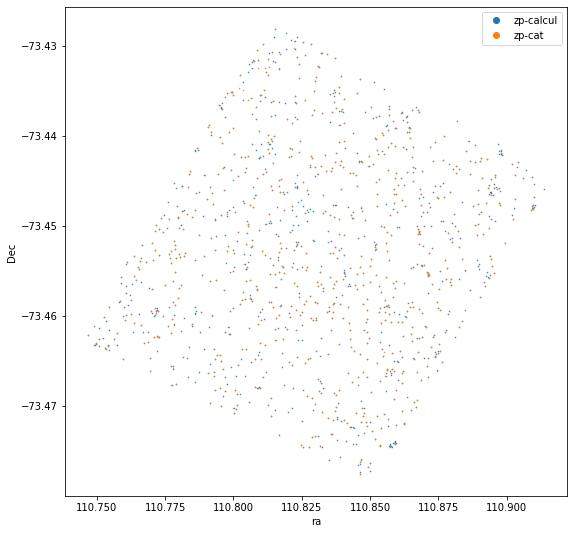

In [59]:
fig, axs = plt.subplots(1, 1, figsize=(9,9))
axs.plot(dat_0['ra'], dat_0['dec'], 'o', ms=0.5, label = 'zp-calcul')
axs.plot(dat_2['ra'], dat_2['dec'], 'o', ms=0.5, label = 'zp-cat')
axs.set_xlabel("ra")
axs.set_ylabel("Dec")
# change legend markersize
lgnd = axs.legend()
lgnd.legendHandles[0]._legmarker.set_markersize(6)
lgnd.legendHandles[1]._legmarker.set_markersize(6)

### 1) Magnitude - magnitude error diagram

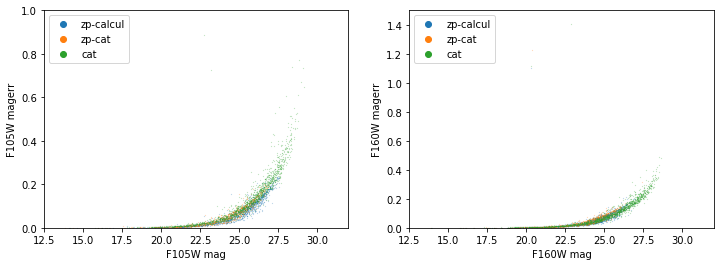

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
# magnitude of 99.0 means the source not detected in the 606-band image but detected in the 814-band image.
ax[0].plot(dat_0['mag_isocor'], dat_0['magerr_isocor'], 'o', ms=0.1, label='zp-calcul')
ax[0].plot(dat_2['mag_isocor'], dat_2['magerr_isocor'], 'o', ms=0.1, label='zp-cat')
ax[0].plot(dat_cat['f105w_mag'], dat_cat['f105w_magerr'], 'o', ms=0.1, label='cat')
ax[0].set_xlim([12.5, 32])
ax[0].set_ylim([0.0, 1.0])
ax[0].set_xlabel('F105W mag')
ax[0].set_ylabel('F105W magerr')

ax[1].plot(dat_1['mag_isocor'], dat_1['magerr_isocor'], 'o', ms=0.1, label='zp-calcul')
ax[1].plot(dat_3['mag_isocor'], dat_3['magerr_isocor'], 'o', ms=0.1, label='zp-cat')
ax[1].plot(dat_cat['f160w_mag'], dat_cat['f160w_magerr'], 'o', ms=0.1, label='cat')
ax[1].set_xlim([12.5, 32])
ax[1].set_ylim([0, 1.5])
ax[1].set_xlabel('F160W mag')
ax[1].set_ylabel('F160W magerr')

#=================================================================
lgnd0 = ax[0].legend()
lgnd0.legendHandles[0]._legmarker.set_markersize(6)
lgnd0.legendHandles[1]._legmarker.set_markersize(6)
lgnd0.legendHandles[2]._legmarker.set_markersize(6)
lgnd1 = ax[1].legend()
lgnd1.legendHandles[0]._legmarker.set_markersize(6)
lgnd1.legendHandles[1]._legmarker.set_markersize(6)
lgnd1.legendHandles[2]._legmarker.set_markersize(6)


### 2) Magnitude - stellarity (``CLASS_STAR``) digram

In [61]:
colnames = ['x','y','num','mag','merr','kron','backgr','ra','dec',
            'a','b','theta','mu0','flag','fwhm','flxrad','cl']

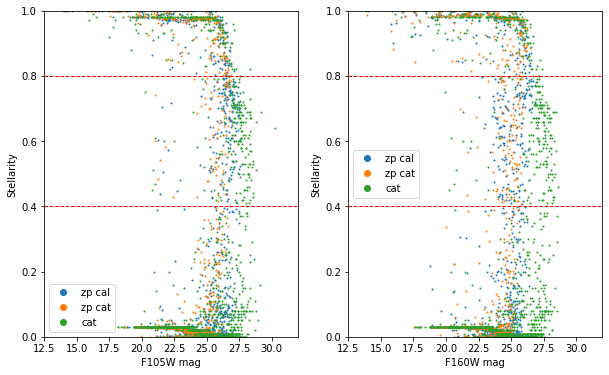

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))
mag_range = (dat_0['mag_isocor'] < 99.0)&(dat_1['mag_isocor']<99.0)
# magnitude of 99.0 means the source not detected in the 606-band image but detected in the 814-band image.
ax[0].plot(dat_0['mag_isocor'], dat_0['cl'], 'o', ms=1, label='zp cal')
ax[0].plot(dat_2['mag_isocor'], dat_2['cl'], 'o', ms=1, label='zp cat')
ax[0].plot(dat_cat['f105w_mag'], dat_cat['stel'], 'o', ms=1, label='cat')
ax[0].set_xlim([12.5, 32])
ax[0].set_ylim([0.0, 1.0])
ax[0].set_xlabel('F105W mag')
ax[0].set_ylabel('Stellarity')
ax[0].axhline(0.4, 0, 1, color='red', ls='--', lw=1)
ax[0].axhline(0.8, 0, 1, color='red', ls='--', lw=1)


ax[1].plot(dat_1['mag_isocor'], dat_1['cl'], 'o', ms=1, label='zp cal')
ax[1].plot(dat_3['mag_isocor'], dat_3['cl'], 'o', ms=1, label='zp cat')
ax[1].plot(dat_cat['f160w_mag'], dat_cat['stel'], 'o', ms=1, label='cat')
ax[1].set_xlim([12.5, 32])
ax[1].set_ylim([0, 1])
ax[1].set_xlabel('F160W mag')
ax[1].set_ylabel('Stellarity')
ax[1].axhline(0.4, 0, 1, color='red', ls='--', lw=1)
ax[1].axhline(0.8, 0, 1, color='red', ls='--', lw=1)

#=================================================================
lgnd0 = ax[0].legend()
lgnd0.legendHandles[0]._legmarker.set_markersize(6)
lgnd0.legendHandles[1]._legmarker.set_markersize(6)
lgnd0.legendHandles[2]._legmarker.set_markersize(6)

lgnd1 = ax[1].legend()
lgnd1.legendHandles[0]._legmarker.set_markersize(6)
lgnd1.legendHandles[1]._legmarker.set_markersize(6)
lgnd1.legendHandles[2]._legmarker.set_markersize(6)

### 3) CMDs of galaxies (just for example!)

In [63]:
dat_V = dat_0
dat_I = dat_1

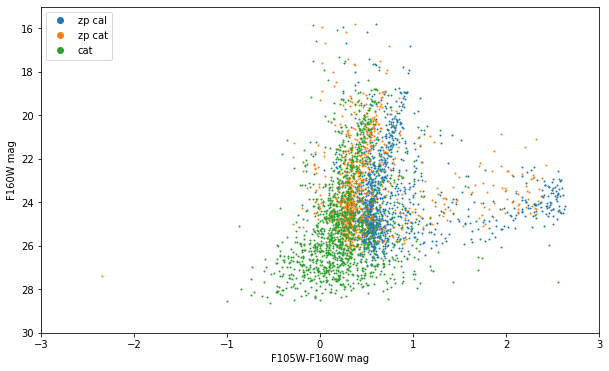

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
galcnd = 1 # (dat_0['mag_isocor'] < 99.0)&(dat_1['mag_isocor']<99.0) #&(dat_0['flxrad'] > 4.) & (dat_0['fwhm'] > 4.) & (dat_1['fwhm'] > 4.) & (dat_1['merr'] < 0.5) & (dat_0['merr'] < 0.5)&(dat_1['cl'] < 0.4)
# magnitude of 99.0 means the source not detected in the 606-band image but detected in the 814-band image.
ax.plot(dat_0['mag_isocor']-dat_1['mag_isocor'], dat_1['mag_isocor'], 'o', ms=1, label='zp cal')
ax.plot(dat_2['mag_isocor']-dat_3['mag_isocor'], dat_3['mag_isocor'], 'o', ms=1, label='zp cat')
ax.plot(dat_cat['f105w_mag']-dat_cat['f160w_mag'], dat_cat['f160w_mag'], 'o', ms=1, label='cat')
ax.set_xlim([-3, 3])
ax.set_ylim([30, 15])
ax.set_xlabel('F105W-F160W mag')
ax.set_ylabel('F160W mag')

#=================================================================
lgnd0 = ax.legend()
lgnd0.legendHandles[0]._legmarker.set_markersize(6)
lgnd0.legendHandles[1]._legmarker.set_markersize(6)
lgnd0.legendHandles[2]._legmarker.set_markersize(6)

ValueError: no field of name mag

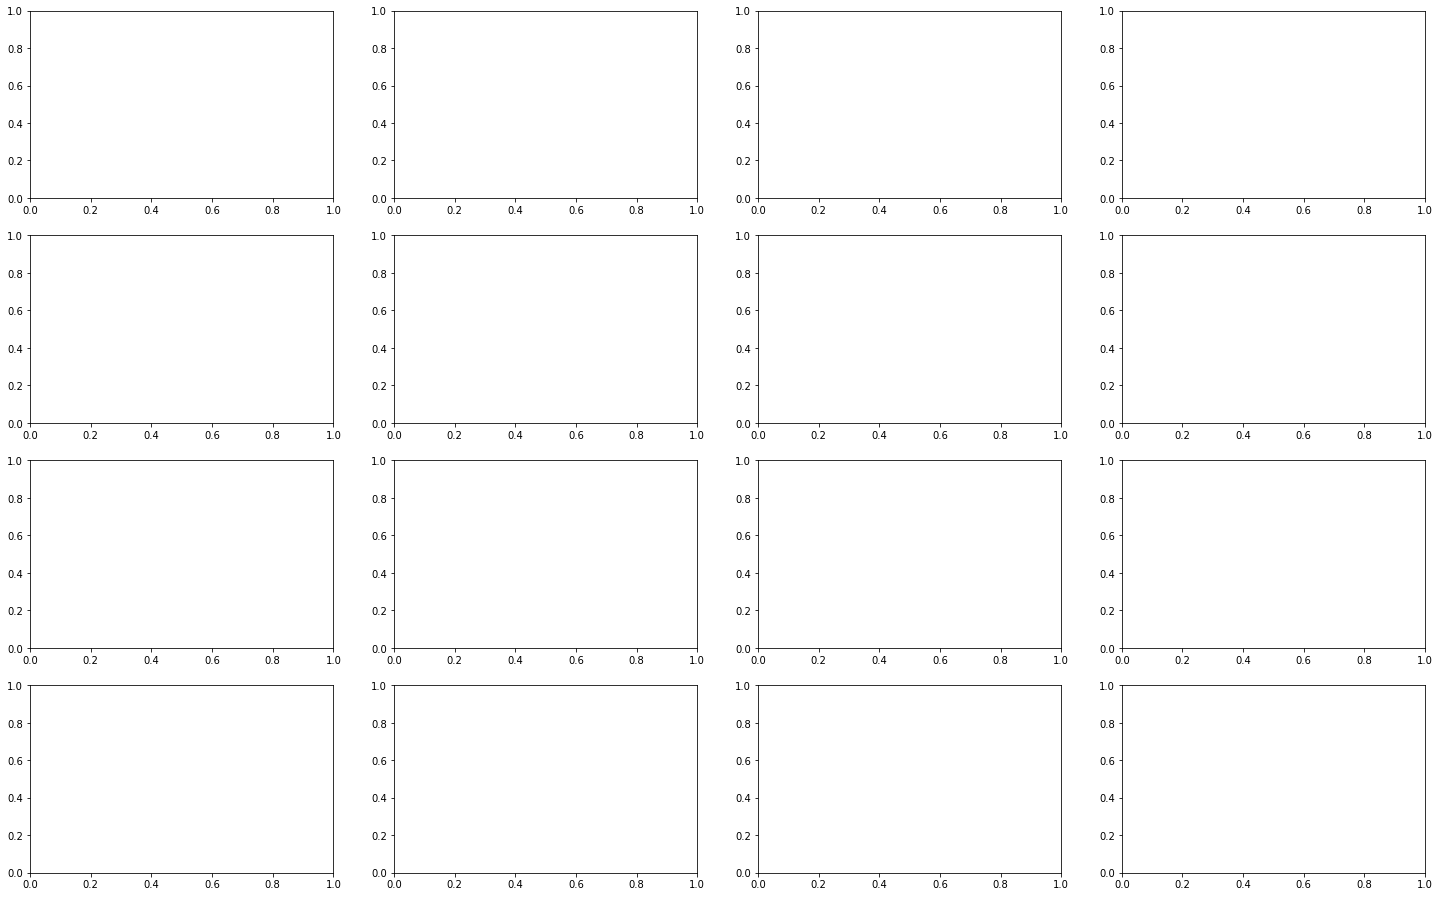

In [51]:
motdat = dat_1

fig = plt.figure(figsize = (25, 20))
gs = fig.add_gridspec(5, 4)
axes = [fig.add_subplot(gs[x,y]) for x in range(4) for y in range(4)]


for i, ax in enumerate(axes):
    mag_range = (motdat['mag'] < 99.0)
    # magnitude of 99.0 means the source not detected in the 606-band image but detected in the 814-band image.
    axes[i].hist(motdat['{}'.format(colnames[i])][mag_range], 30)
    axes[i].set_xlabel('{}'.format(colnames[i]))

axrem = fig.add_subplot(gs[4,0])
axrem.hist(motdat['{}'.format(colnames[-1])][mag_range], 30)
axrem.set_xlabel('{}'.format(colnames[-1]))


# plt.scatter(dat[1]['ra'], dat[1]['dec'], s = 0.1)
# plt.show()
# plt.scatter(dat[1]['ra'], dat[1]['dec'], s = 0.1)